# Activation function

\begin{align*}
Binary \space Step \space Function (x) = 
\begin{cases}
1 \quad if \quad \sum_{i=1}^{m} w_i x_i + b \ge threshold \\
0 \quad if \quad \sum_{i=1}^{m} w_i x_i + b \lt threshold \\
\end{cases}
\end{align*}

\begin{align*}
ReLU (x) = 
\begin{cases}
0 \quad if \quad x \lt 0 \\
1 \quad if \quad x \ge  x
\end{cases}
\end{align*}

\begin{align*}
Sigmoid (x) = 

\frac{1}{1 + e^{-x}} \in [0, 1]

\end{align*}

\begin{align*}
Tanh (x) = 

\frac{ e^{x} - e^{-x}  }{ e^{x} + e^{-x}} \in [-1, 1]

\end{align*}

# Derivative / Gradient

## Derivative

$$
f'(x) = lim_{\triangle x \rightarrow 0} \frac { f(x+\triangle) - f(x) } {\triangle x} \\ 
y' = lim_{\triangle x \rightarrow 0} \frac { \triangle y } {\triangle x} \\
\frac {dy} {dx} = lim_{\triangle x \rightarrow 0} \frac { \triangle y } {\triangle x}
$$

## Gradient

$$
\nabla f = [ \frac{\partial f}{\partial x} , \frac{\partial f}{\partial y} , \frac{\partial f}{\partial z} ]  \\ 
\nabla f = [ \frac{\partial f}{\partial x}i + \frac{\partial f}{\partial y}j + \frac{\partial f}{\partial z}k ]
$$

## Direction of increase of function

$$
D_{\vec{b}}f = \nabla f.\vec{b} = \|  \nabla f \| \| b \| \cos{\theta}
$$

## Gradient Decent

$$
\vec{x_0} = (x_0, y_0) \\
\vec{x_{n+1}} = \vec{x_n} - \eta \nabla f \vec{x_n}
$$

$w_{j, i}$ là trọng số kết nối từ ngõ vào neural thứ i đến neural thứ j ở lớp sau nó
$$
a_j = \sum_{i=1}^{n}x_i w_{j,i} + b_j \\
o_j = \sigma (a_j) = \frac{1}{1 + e^{-a_j}} \\
$$

# Cost function 

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - (ax_i+b)^2) \\
$$

# Update

$$
J = Costfunction() \\
w = w - \eta\frac{\partial J}{\partial w}
$$

# Train new neural network with gradient descent

$$
a_j = \sum_{i=1}^{20}x_i w_{j, i} + b_j \\
o_j = \sigma(a_j)=\frac{1}{1+e^{-a_j}}  \\
J = \frac{1}{5} \sum_{t=1}^{5} \sum_{k=1}^{5} (y_k^t - o_k^t)^2 \space trong \ đó \ k: \ là \ số \ ngõ \ ra, \ t \ là \ số \ mẫu \
$$

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Character matrix and target labels
char = np.matrix([
    [0, 0, 1, 0,
     0, 1, 1, 0,
     0, 0, 1, 0,
     0, 0, 1, 0,
     1, 1, 1, 1], 
    [1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1,
     1, 0, 0, 0,
     1, 1, 1, 1],
    [1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1],
    [1, 0, 0, 1,
     1, 0, 0, 1,
     1, 1, 1, 1,
     0, 0, 0, 1,
     0, 0, 0, 1],
    [1, 1, 1, 1,
     1, 0, 0, 0,
     1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1]
], dtype=np.int8)

target = np.matrix([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
])


In [3]:

# Function for sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

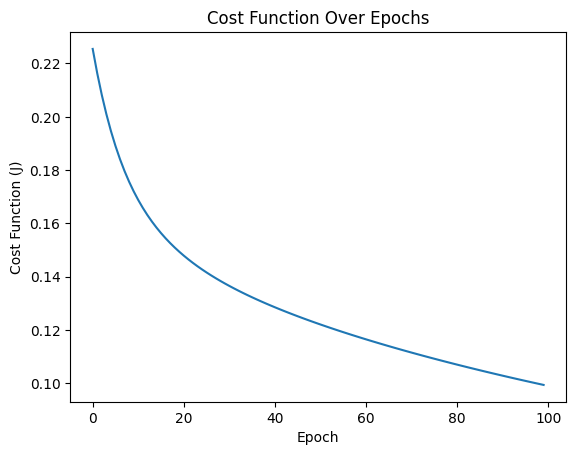

In [4]:

# Hyperparameters
alpha = 0.1  # Learning rate
epochs = 100  # Number of epochs

# Weight initialization
w = np.matrix(np.random.uniform(-0.1, 0.1, (5, 20)))

# To track cost function (J) values over epochs
J = np.zeros(epochs)

for epoch in range(epochs):
    dJ_dw = np.zeros_like(w)  # Initialize gradient to zero for each epoch
    total_cost = 0  # Initialize total cost for each epoch
    
    for sample in range(5):  # Loop over all samples
        X = char[sample, :]  # Input character sample
        y = target[sample, :]  # Corresponding target
        
        # Forward pass
        y_pred = sigmoid(np.dot(X, w.T))  # Predicted output
        
        # Compute error and gradients
        error = y - y_pred
        delta = np.multiply(np.multiply(error, y_pred), (1 - y_pred))  # Derivative of sigmoid
        dJ_dw += delta.T * X  # Accumulate gradients
        
        # Cost (Mean Squared Error for this sample)
        total_cost += np.mean(np.power(error, 2))
    
    # Update weights after processing all samples
    w += alpha * dJ_dw / 5  # Gradient step, averaged over the samples
    
    # Store the cost for this epoch
    J[epoch] = total_cost / 5

# Plot the cost function over epochs
plt.plot(J)
plt.ylabel('Cost Function (J)')
plt.xlabel('Epoch')
plt.title('Cost Function Over Epochs')
plt.show()


# Backpropagation and gradient descent

In [5]:
import numpy as np 
import pandas as pd
from abc import abstractmethod

In [6]:
train_data = np.loadtxt('mnist_train.csv', delimiter= ',')
test_data = np.loadtxt('mnist_test.csv', delimiter= ',')

In [7]:
X_train = train_data[:, 1:]
X_test = test_data[:, 1:]

y_train = train_data[:, 0]
y_test = test_data[:, 0]

In [229]:
import numpy as np
np.random.seed(42)


class ActivationFunc:
    def __init__(self, input) -> None:
        self.input = input

    def ReLu(self):
        # return np.where(self.input >= 0, self.input, 0)
        return self.input
    
    def SoftMax(self):
        sum = np.sum(np.exp(self.input), axis= 1)
        # max = np.max(self.input)
        return np.exp(self.input) / sum

class NeuralNetwork:
    def __init__(self, *, number_neural_input: int, hidden_layer: tuple,
                  number_neural_output: int, learning_rate: float, optimizer: list,
                    layer_activation_fn: list, input: np.array, target= np.array) -> None:
        self.number_neural_input = number_neural_input
        self.hidden_layer = hidden_layer
        self.number_neural_output = number_neural_output
        self.learning_rate = learning_rate
        self.layer_activation_fn = layer_activation_fn
        self.optimizer = optimizer
        
        self.input = input
        self.target = target
        self.len = len(input)

    def __call__(self):
        # Create array representing the network architecture
        self.array = np.insert(self.hidden_layer, 0, self.number_neural_input)
        self.array = np.append(self.array, self.number_neural_output)
        self.error_layer = [0]*(len(self.array) - 1 )
        self.list_vectors_layer = [0]*(len(self.array))
        self.list_vectors_layer[0] = self.input
        self.matrices_weights = [0]*(len(self.array) - 1)
        self.matrices_biases = [0]*(len(self.array) - 1)

        self.create_matrices_bias_layer()
        self.create_matrices_weight_layer()

    def normalize(self, vector):
        """Normalizes the input vector."""
        mean = np.mean(vector)  # Calculate the mean
        std = np.std(vector)  # Calculate the standard deviation
        normalized_vector = (vector - mean) / std  # Normalize the vector
        return normalized_vector

    def create_matrices_weight_layer(self):
        """Creates weight matrices for each layer."""
        for idx, value in enumerate(self.array):
            if idx+1 > len(self.array) - 1:
                break
            else:
                matrix_weight = np.random.randn(self.array[idx], self.array[idx+1]) / 10
                self.matrices_weights[idx] = matrix_weight

    def create_matrices_bias_layer(self):
        """Creates bias matrices for each layer."""
        for idx, num_bias in enumerate(self.array[1:]):
            matrix_bias = np.random.randn(1, num_bias) / 10
            self.matrices_biases[idx] = matrix_bias

    def feed_forward(self):
        """Performs feedforward calculation for the network."""
        vector = self.input.reshape(self.len, -1)  # Reshaping input
        # print(vector.shape)

        for idx, (weight, bias) in enumerate(zip(self.matrices_weights, self.matrices_biases)):
            print(self.layer_activation_fn[idx])
            # print(idx, (weight, bias))

            vector = vector @ weight + bias  # Matrix multiplication and bias addition
            # print(vector)
            vector_activated = ActivationFunc(vector).ReLu()

            self.list_vectors_layer[idx + 1] = vector_activated
        return vector_activated
    
    def cal_error_layer(self):
        self.error_layer[-1] = (self.target - self.list_vectors_layer[-1])*self.list_vectors_layer[-1]*(1 - self.list_vectors_layer[-1])
        # print(self.error_layer[-1])

        for idx, _ in enumerate(reversed(self.matrices_weights)):
            reverse_i = len(self.matrices_weights) - 1 - idx
            if reverse_i == len(self.matrices_weights) - 1:
                self.error_layer[-1] = (self.target - self.list_vectors_layer[-1])*self.list_vectors_layer[-1]*(1 - self.list_vectors_layer[-1])
            else:
                self.error_layer[reverse_i] = self.error_layer[reverse_i + 1] @ self.matrices_weights[reverse_i + 1].T
                # print(reverse_i + 1)

                # print(self.error_layer[reverse_i + 1].shape)
                # print(self.matrices_weights[reverse_i + 1].T.shape)

    def back_prop(self):

        for idx, matrix in enumerate(reversed(self.matrices_weights)):
            reverse_i = len(self.matrices_weights) - 1 - idx
            print(reverse_i)

            len_ = self.error_layer[reverse_i].shape[1]
            print(len_)

            predict_ = self.list_vectors_layer[reverse_i].reshape(-1, 1).repeat(len_, 1)
            print(predict_)

            self.matrices_weights[reverse_i] += self.learning_rate * self.error_layer[reverse_i] * predict_ 


In [230]:
layer_activation_fn = ['ReLu', 'ReLu', 'Softmax']
neural = NeuralNetwork(number_neural_input= 5, hidden_layer= (3, 3), number_neural_output= 2, learning_rate= 2, optimizer= 'str',
                       layer_activation_fn= layer_activation_fn, input= np.zeros((1, 5)), target= np.zeros((1, 2)))

In [242]:
import numpy as np
np.random.seed(42)

class ActivationFunction:
    @staticmethod
    def relu(x):
        return np.maximum(0, x)

    @staticmethod
    def relu_derivative(x):
        return np.where(x > 0, 1, 0)

    @staticmethod
    def softmax(x):
        # Đảm bảo tính ổn định số học
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size, learning_rate, activation_functions, inputs, targets):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.activation_functions = activation_functions
        self.inputs = inputs
        self.targets = targets
        self.num_samples = len(inputs)

        # Xây dựng kiến trúc mạng
        self.layer_sizes = [self.input_size] + list(self.hidden_layers) + [self.output_size]

        # Khởi tạo trọng số và bias
        self.weights = []
        self.biases = []
        for idx in range(len(self.layer_sizes) - 1):
            weight_matrix = np.random.randn(self.layer_sizes[idx], self.layer_sizes[idx + 1]) / np.sqrt(self.layer_sizes[idx])
            bias_vector = np.zeros((1, self.layer_sizes[idx + 1]))
            self.weights.append(weight_matrix)
            self.biases.append(bias_vector)

    def feed_forward(self):
        """Thực hiện tính toán feedforward."""
        self.activations = [self.inputs]
        self.pre_activations = []
        for idx in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[idx]) + self.biases[idx]
            self.pre_activations.append(z)
            # Áp dụng hàm kích hoạt
            if self.activation_functions[idx] == 'relu':
                a = ActivationFunction.relu(z)
            elif self.activation_functions[idx] == 'softmax':
                a = ActivationFunction.softmax(z)
            else:
                raise ValueError(f"Hàm kích hoạt không được hỗ trợ: {self.activation_functions[idx]}")
            self.activations.append(a)
        return self.activations[-1]

    def back_propagate(self):
        """Thực hiện backpropagation và cập nhật trọng số và bias."""
        deltas = [0] * len(self.weights)
        # Tính delta cho lớp output
        if self.activation_functions[-1] == 'softmax':
            delta = self.activations[-1] - self.targets
        else:
            delta = (self.activations[-1] - self.targets) * ActivationFunction.relu_derivative(self.pre_activations[-1])
        deltas[-1] = delta

        # Lan truyền ngược lỗi
        for idx in reversed(range(len(deltas) - 1)):
            if self.activation_functions[idx] == 'relu':
                derivative = ActivationFunction.relu_derivative(self.pre_activations[idx])
            else:
                derivative = 1  # Giả định hàm kích hoạt tuyến tính
            delta = np.dot(deltas[idx + 1], self.weights[idx + 1].T) * derivative
            deltas[idx] = delta

        # Cập nhật trọng số và bias
        for idx in range(len(self.weights)):
            weight_gradient = np.dot(self.activations[idx].T, deltas[idx]) / self.num_samples
            bias_gradient = np.sum(deltas[idx], axis=0, keepdims=True) / self.num_samples
            self.weights[idx] -= self.learning_rate * weight_gradient
            self.biases[idx] -= self.learning_rate * bias_gradient

    def train(self, epochs):
        for epoch in range(epochs):
            output = self.feed_forward()
            loss = self.compute_loss(output, self.targets)
            self.back_propagate()
            print(f"Epoch {epoch + 1}, Loss: {loss}")

    def compute_loss(self, predictions, targets):
        if self.activation_functions[-1] == 'softmax':
            # Sử dụng hàm mất mát cross-entropy
            epsilon = 1e-12
            predictions = np.clip(predictions, epsilon, 1. - epsilon)
            N = predictions.shape[0]
            ce_loss = -np.sum(targets * np.log(predictions + 1e-9)) / N
            return ce_loss
        else:
            # Sử dụng MSE cho các hàm kích hoạt khác
            mse_loss = np.mean((predictions - targets) ** 2)
            return mse_loss
        
# Định nghĩa các tham số mạng
input_size = 784  # Kích thước đầu vào (ví dụ, ảnh MNIST)
hidden_layers = [128, 64]  # Các lớp ẩn
output_size = 10  # Số lớp đầu ra (số lớp phân loại)
learning_rate = 0.01
activation_functions = ['relu', 'relu', 'softmax']

# Tạo dữ liệu đầu vào và mục tiêu
inputs = np.random.rand(1000, input_size)  # Dữ liệu đầu vào mẫu
targets = np.zeros((1000, output_size))
# Gán nhãn mục tiêu (one-hot encoding)
for i in range(1000):
    targets[i, np.random.randint(0, output_size)] = 1

# Khởi tạo và huấn luyện mạng
nn = NeuralNetwork(input_size, hidden_layers, output_size, learning_rate, activation_functions, inputs, targets)
nn.train(epochs=10000)



Epoch 1, Loss: 2.3443628093598075
Epoch 2, Loss: 2.3399367042692045
Epoch 3, Loss: 2.336071394497047
Epoch 4, Loss: 2.332675191478719
Epoch 5, Loss: 2.329737059904788
Epoch 6, Loss: 2.3271983675031747
Epoch 7, Loss: 2.324985189029778
Epoch 8, Loss: 2.323041501413533
Epoch 9, Loss: 2.3213250543905875
Epoch 10, Loss: 2.3197939974785107
Epoch 11, Loss: 2.318396607773568
Epoch 12, Loss: 2.3170970735245144
Epoch 13, Loss: 2.3159404569626902
Epoch 14, Loss: 2.3148091014582506
Epoch 15, Loss: 2.3137340032056435
Epoch 16, Loss: 2.3127300504852912
Epoch 17, Loss: 2.311822577942881
Epoch 18, Loss: 2.310987337644218
Epoch 19, Loss: 2.310231338595347
Epoch 20, Loss: 2.309513521014779
Epoch 21, Loss: 2.308854837028756
Epoch 22, Loss: 2.3082152492243284
Epoch 23, Loss: 2.3076178590320793
Epoch 24, Loss: 2.3070633053448057
Epoch 25, Loss: 2.3065447583185787
Epoch 26, Loss: 2.306042230962037
Epoch 27, Loss: 2.305545214285342
Epoch 28, Loss: 2.3050580232348934
Epoch 29, Loss: 2.3045857015362583
Epoch 3

In [240]:
import numpy as np
np.random.seed(42)

class ActivationFunc:
    def __init__(self, input) -> None:
        self.input = input

    def ReLu(self):
        return np.maximum(0, self.input)
    
    def ReLu_derivative(self):
        return np.where(self.input > 0, 1, 0)

    def SoftMax(self):
        # Đảm bảo tính ổn định số học
        exp_values = np.exp(self.input - np.max(self.input, axis=1, keepdims=True))
        sum_exp = np.sum(exp_values, axis=1, keepdims=True)
        return exp_values / sum_exp

class NeuralNetwork:
    def __init__(self, *, number_neural_input: int, hidden_layer: tuple,
                  number_neural_output: int, learning_rate: float, optimizer: list,
                    layer_activation_fn: list, input: np.array, target= np.array) -> None:
        self.number_neural_input = number_neural_input
        self.hidden_layer = hidden_layer
        self.number_neural_output = number_neural_output
        self.learning_rate = learning_rate
        self.layer_activation_fn = layer_activation_fn
        self.optimizer = optimizer
        
        self.input = input
        self.target = target
        self.len = len(input)

    def __call__(self):
        # Tạo mảng đại diện cho kiến trúc mạng
        self.array = np.insert(self.hidden_layer, 0, self.number_neural_input)
        self.array = np.append(self.array, self.number_neural_output)
        self.error_layer = [0]*(len(self.array) - 1 )
        self.list_vectors_layer = [0]*(len(self.array))
        self.list_vectors_layer[0] = self.input
        self.matrices_weights = [0]*(len(self.array) - 1)
        self.matrices_biases = [0]*(len(self.array) - 1)

        self.create_matrices_bias_layer()
        self.create_matrices_weight_layer()

    def normalize(self, vector):
        """Chuẩn hóa vector đầu vào."""
        mean = np.mean(vector)
        std = np.std(vector)
        normalized_vector = (vector - mean) / std
        return normalized_vector

    def create_matrices_weight_layer(self):
        """Tạo ma trận trọng số cho mỗi lớp."""
        for idx, value in enumerate(self.array):
            if idx+1 > len(self.array) - 1:
                break
            else:
                matrix_weight = np.random.randn(self.array[idx], self.array[idx+1]) / 10
                self.matrices_weights[idx] = matrix_weight

    def create_matrices_bias_layer(self):
        """Tạo ma trận bias cho mỗi lớp."""
        for idx, num_bias in enumerate(self.array[1:]):
            matrix_bias = np.random.randn(1, num_bias) / 10
            self.matrices_biases[idx] = matrix_bias

    def feed_forward(self):
        """Thực hiện tính toán feedforward cho mạng."""
        vector = self.input.reshape(self.len, -1)  # Định hình lại đầu vào

        for idx, (weight, bias) in enumerate(zip(self.matrices_weights, self.matrices_biases)):
            print(self.layer_activation_fn[idx])

            vector = vector @ weight + bias  # Nhân ma trận và cộng bias

            activation_func = ActivationFunc(vector)
            if self.layer_activation_fn[idx] == 'ReLu':
                vector_activated = activation_func.ReLu()
            elif self.layer_activation_fn[idx] == 'SoftMax':
                vector_activated = activation_func.SoftMax()
            else:
                raise ValueError(f"Hàm kích hoạt không được hỗ trợ: {self.layer_activation_fn[idx]}")

            self.list_vectors_layer[idx + 1] = vector_activated
            vector = vector_activated  # Sử dụng đầu ra đã kích hoạt cho lớp tiếp theo

        return vector_activated
    
    def cal_error_layer(self):
        """Tính toán lỗi cho mỗi lớp."""
        # Lỗi của lớp đầu ra
        self.error_layer[-1] = self.list_vectors_layer[-1] - self.target

        # Lỗi của các lớp ẩn
        for idx in reversed(range(len(self.error_layer) - 1)):
            reverse_i = idx
            activation_input = self.list_vectors_layer[reverse_i + 1]
            activation_func = ActivationFunc(activation_input)

            if self.layer_activation_fn[reverse_i] == 'ReLu':
                activation_derivative = activation_func.ReLu_derivative()
            else:
                activation_derivative = 1  # Giả sử hàm kích hoạt tuyến tính nếu không phải ReLu

            weight_next = self.matrices_weights[reverse_i + 1]
            error_next = self.error_layer[reverse_i + 1]

            self.error_layer[reverse_i] = (error_next @ weight_next.T) * activation_derivative

    def back_prop(self):
        """Cập nhật trọng số và bias dựa trên lỗi đã tính."""
        for idx in reversed(range(len(self.matrices_weights))):
            reverse_i = idx
            print(reverse_i)

            activation_prev = self.list_vectors_layer[reverse_i]  # Đầu ra của lớp trước
            error_current = self.error_layer[reverse_i]  # Lỗi của lớp hiện tại

            # Tính gradient
            gradient_weights = activation_prev.T @ error_current  # Gradient cho trọng số
            gradient_biases = np.sum(error_current, axis=0, keepdims=True)  # Gradient cho bias

            # Cập nhật trọng số và bias
            self.matrices_weights[reverse_i] -= self.learning_rate * gradient_weights
            self.matrices_biases[reverse_i] -= self.learning_rate * gradient_biases

    def compute_loss(self, predictions, targets):
        if self.activation_functions[-1] == 'softmax':
            # Sử dụng hàm mất mát cross-entropy
            epsilon = 1e-12
            predictions = np.clip(predictions, epsilon, 1. - epsilon)
            N = predictions.shape[0]
            ce_loss = -np.sum(targets * np.log(predictions + 1e-9)) / N
            return ce_loss
        else:
            # Sử dụng MSE cho các hàm kích hoạt khác
            mse_loss = np.mean((predictions - targets) ** 2)
            return mse_loss

    def train(self, epochs):
        for epoch in range(epochs):
            output = self.feed_forward()
            loss = self.compute_loss(output, self.targets)
            self.back_prop()
            print(f"Epoch {epoch + 1}, Loss: {loss}")

# Định nghĩa các tham số mạng
number_neural_input = 784  # Kích thước đầu vào
hidden_layer = (128, 64)  # Các lớp ẩn
number_neural_output = 10  # Số lớp đầu ra
learning_rate = 0.01
optimizer = []  # Chưa sử dụng trong mã
layer_activation_fn = ['ReLu', 'ReLu', 'SoftMax']  # Hàm kích hoạt cho mỗi lớp

# Tạo dữ liệu đầu vào và mục tiêu
input_data = np.random.rand(1000, number_neural_input)  # Dữ liệu đầu vào mẫu
target_data = np.zeros((1000, number_neural_output))
for i in range(1000):
    target_data[i, np.random.randint(0, number_neural_output)] = 1  # One-hot encoding

# Khởi tạo và huấn luyện mạng
nn = NeuralNetwork(
    number_neural_input=number_neural_input,
    hidden_layer=hidden_layer,
    number_neural_output=number_neural_output,
    learning_rate=learning_rate,
    optimizer=optimizer,
    layer_activation_fn=layer_activation_fn,
    input=input_data,
    target=target_data
)

# Gọi phương thức __call__ để khởi tạo mạng
nn()

# Thực hiện feedforward
output = nn.feed_forward()

# Tính toán lỗi
nn.cal_error_layer()

# Cập nhật trọng số và bias
nn.back_prop()

ReLu
ReLu
SoftMax
2
1
0
